In [1]:
import numpy as np
import pandas as pd
import glob
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import os

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison_with_std(path1, path2, title):
    df_prediction = pd.read_csv(path1)
    df_gt = pd.read_csv(path2)
    time = df_prediction['Time'] if 'Time' in df_prediction.columns else range(len(df_prediction))
    start = 0
    end = -1

    if start is not None and end is not None:
        df_prediction = df_prediction.iloc[start:end]
        df_gt = df_gt.iloc[start:end]
        time = df_prediction['Time'] if 'Time' in df_prediction.columns else range(start, end)

    angles = ['Flexion', 'Adduction', 'Rotation']
    colors = {
        'prediction': ['#D5BDAF', '#D5BDAF', '#D5BDAF'],  # 線條
        'gt': ['#778DA9', '#778DA9', '#778DA9'],          # 線條
        'prediction_fill': ['#D6CCC2', '#D6CCC2', '#D6CCC2'],  # 陰影
        'gt_fill': ['#778DA9', '#778DA9', '#778DA9']           # 陰影
    }

    plt.figure(figsize=(12, 8))
    plt.suptitle(title, fontsize=16)

    for idx, angle in enumerate(angles, 1):
        pred = df_prediction[angle]
        gt = df_gt[angle]

        pred_mean = pred.rolling(window=50, center=True).mean()
        pred_std = pred.rolling(window=50, center=True).std()

        gt_mean = gt.rolling(window=50, center=True).mean()
        gt_std = gt.rolling(window=50, center=True).std()

        plt.subplot(3, 1, idx)
        plt.plot(time, pred_mean, label=f"{angle}_prediction", color=colors['prediction'][idx-1], linewidth = 1.5)
        plt.fill_between(time, pred_mean - pred_std, pred_mean + pred_std,
                         color=colors['prediction_fill'][idx-1], alpha=0.5)

        plt.plot(time, gt_mean, label=f"{angle}_gt", color=colors['gt'][idx-1], linewidth = 1.5)
        plt.fill_between(time, gt_mean - gt_std, gt_mean + gt_std,
                         color=colors['gt_fill'][idx-1], alpha=0.5)

        plt.ylabel("Angle (°)")
        plt.legend()
        plt.grid(True)

    plt.xlabel("Data points")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [ ]:
def plot_prediction_and_ground_truth(path, title):
    df = pd.read_csv(path)
    time = df['Time'] if 'Time' in df.columns else range(len(df))
    start = 5000
    end = 7500

    if start is not None and end is not None:
        df = df.iloc[start:end]
        time = df['Time'] if 'Time' in df.columns else range(start, end)
        
    flexion = df['Flexion']
    adduction = df['Adduction']
    rotation = df['Rotation']
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(title, fontsize=16)  # Title for the whole figure
    
    plt.subplot(3, 1, 1)
    plt.plot(time, flexion, label='Flexion', linewidth=1.2)
    plt.ylabel("Angle (°)")
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(time, adduction, label='Adduction', linewidth=1.2)
    plt.ylabel("Angle (°)")
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(time, rotation, label='Rotation', linewidth=1.2)
    plt.xlabel("Time (frames or s)")
    plt.ylabel("Angle (°)")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for suptitle
    plt.show()

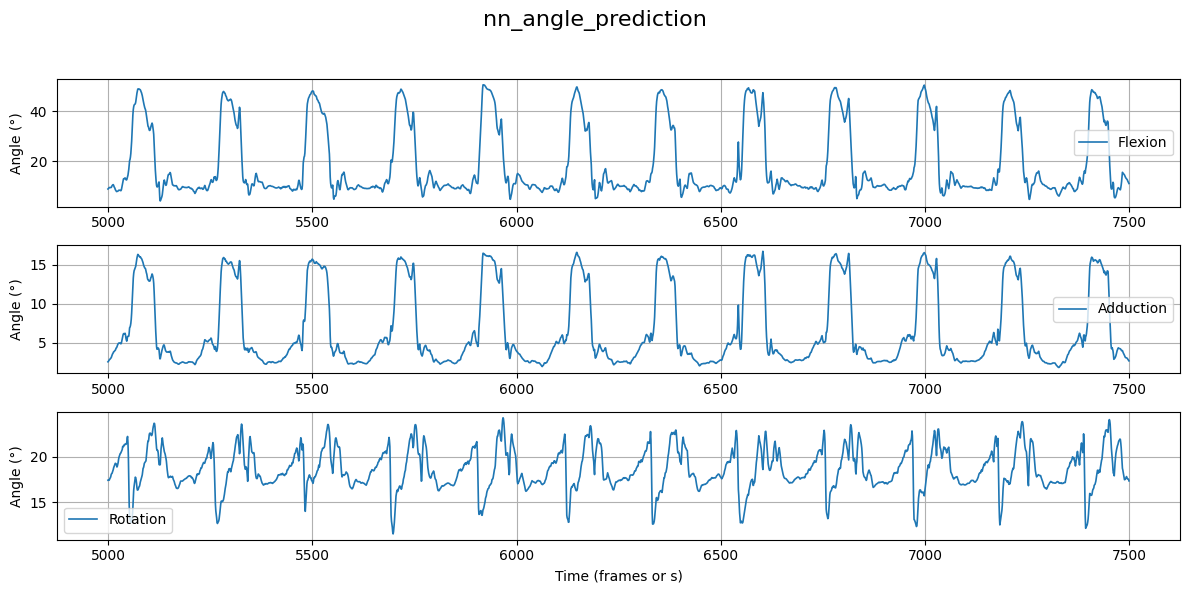

In [23]:
plot_prediction_and_ground_truth("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/result/nn_prediction.csv", "nn_angle_prediction")

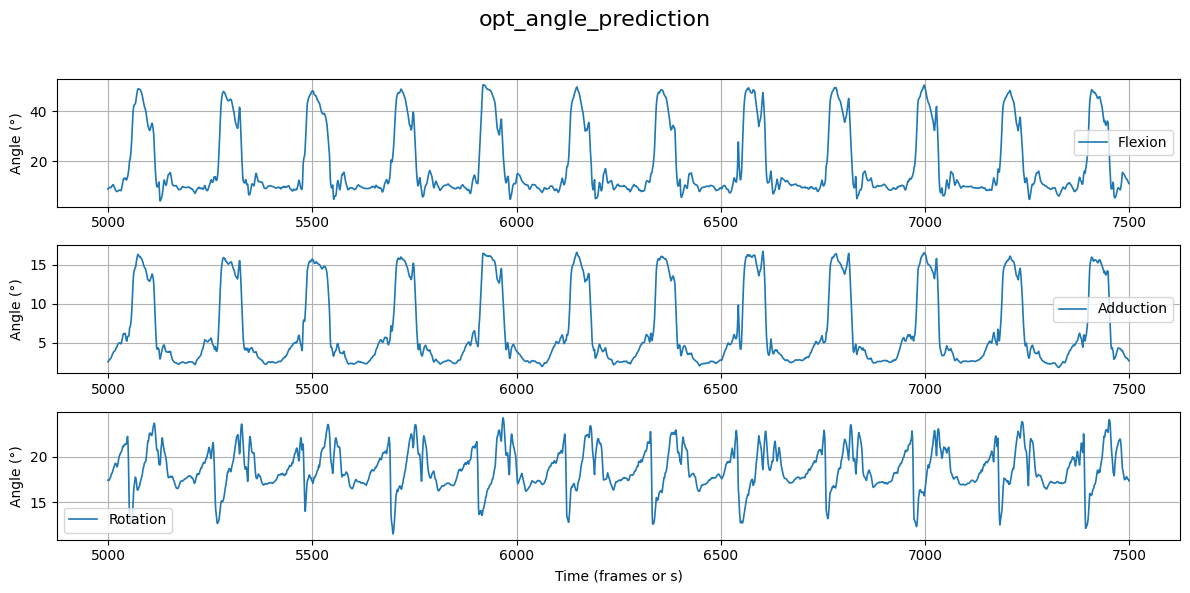

In [24]:
plot_prediction_and_ground_truth("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/result/opt_prediction.csv", "opt_angle_prediction")

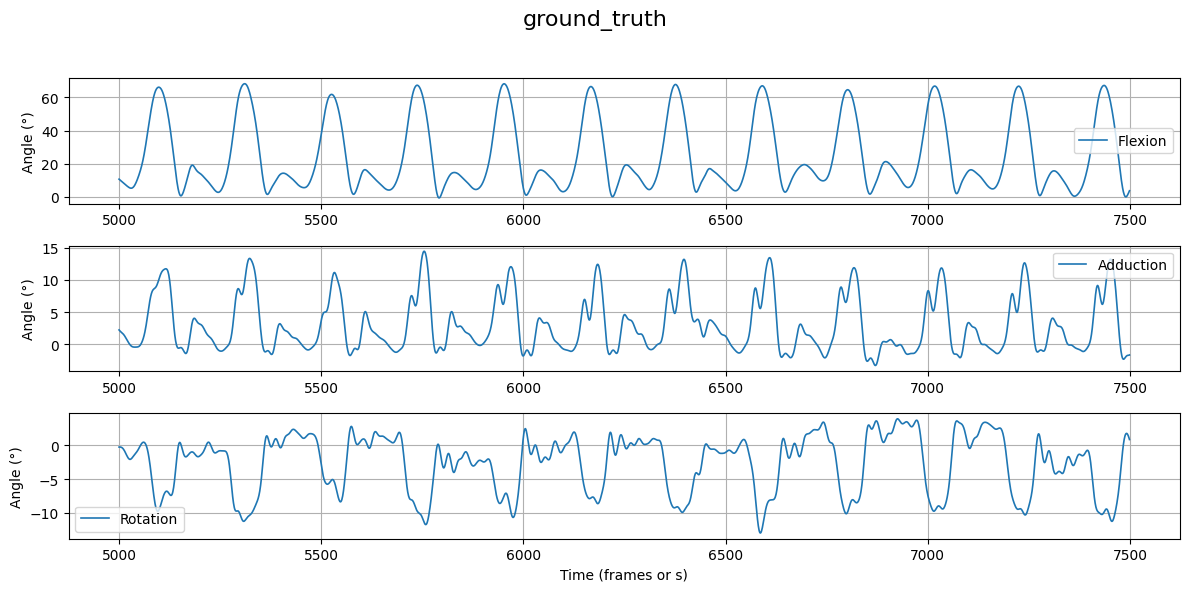

In [ ]:
plot_prediction_and_ground_truth("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/result/ground_truth.csv", "ground_truth")

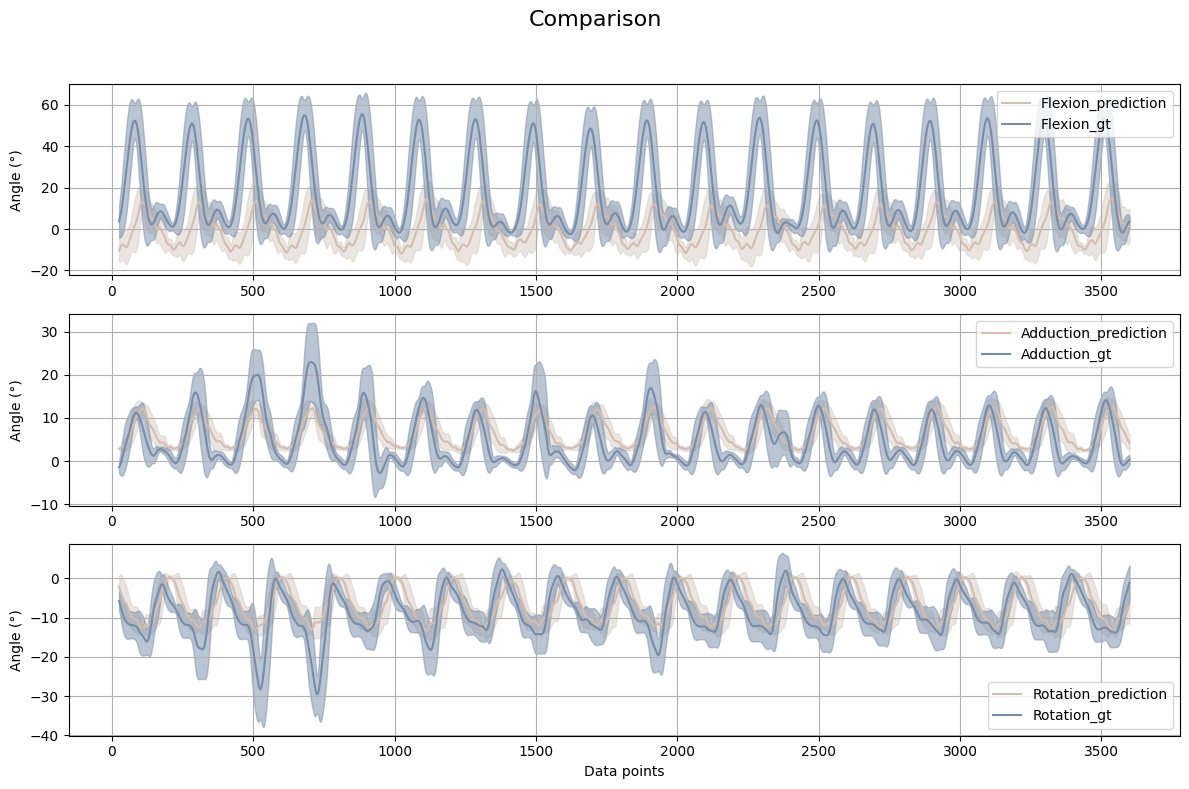

In [53]:
path2 = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/result/finetuned_results/Walking/ground_truth.csv"
path1 = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/result/finetuned_results/Walking/opt_prediction.csv"
plot_comparison_with_std(path1, path2, "Comparison")